In [ ]:
# pip install tensorflow numpy matplotlib

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerator for training with normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Min-Max scaling to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.15          # 15% of training data for validation
)

# Define ImageDataGenerator for testing with normalization
test_datagen = ImageDataGenerator(
    rescale=1./255,                # Min-Max scaling to [0,1]
    validation_split=0.15          # 15% of testing data for validation
)

In [ ]:
# Paths
import os
combined_dataset_path = '/content/drive/My Drive/AnimalBreedClassification/aumentated/combinedData/'    # Replace with your path
output_split_path = '/content/drive/My Drive/AnimalBreedClassification/'          # Replace with your path

# Assuming you have already split the dataset into 'train' and 'test' directories
train_directory = os.path.join(output_split_path, 'train')
test_directory = os.path.join(output_split_path, 'test')

# Create Training Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),         # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training',              # Set as training data
    shuffle=True,
    seed=42
)

# Create Validation Generator from Training Data
validation_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',            # Set as validation data
    shuffle=True,
    seed=42
)

# Create Testing Generator
test_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5431 images belonging to 15 classes.
Found 945 images belonging to 15 classes.
Found 1126 images belonging to 15 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten,
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras import regularizers

def build_alexnet(input_shape=(224, 224, 3), num_classes=15):

    model = Sequential()

    # 1. Conv Layer 1
    model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4),
                     activation='relu', input_shape=input_shape,
                     kernel_regularizer=regularizers.l2(0.0002)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 2. Conv Layer 2
    model.add(Conv2D(filters=256, kernel_size=(5,5), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 3. Conv Layer 3
    model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))

    # 4. Conv Layer 4
    model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))

    # 5. Conv Layer 5
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same',
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.0002)))
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
    model.add(BatchNormalization())

    # 6. Flatten
    model.add(Flatten())

    # 7. Fully Connected Layer 1
    model.add(Dense(4096, activation='relu',
                    kernel_regularizer=regularizers.l2(0.0005)))
    model.add(Dropout(0.5))

    # 8. Fully Connected Layer 2
    model.add(Dense(4096, activation='relu',
                    kernel_regularizer=regularizers.l2(0.0005)))
    model.add(Dropout(0.5))

    # 9. Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Example Usage:
# Assuming you have 3 categories (cat, dog, cattle)
num_classes = 15
alexnet_model = build_alexnet(input_shape=(224, 224, 3), num_classes=num_classes)
alexnet_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 26, 26, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      26,218,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 15)                  │          61,455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,810,895 (178.57 MB)

 Trainable params: 46,809,679 (178.56 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to the training and testing directories
train_directory = '/content/drive/My Drive/AnimalBreedClassification/train'
test_directory = '/content/drive/My Drive/AnimalBreedClassification/test'

# Define ImageDataGenerator for training with augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values to [0,1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define ImageDataGenerator for validation/testing with only normalization
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Create Training Generator
train_generator = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size=(224, 224),         # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Create Validation Generator
validation_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6376 images belonging to 15 classes.
Found 1126 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Update filepath to use '.keras' extension
checkpoint = ModelCheckpoint(
    'alexnet_best_model.keras',  # Changed from 'alexnet_best_model.h5'
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)



callbacks_list = [checkpoint, early_stop]


In [ ]:
# Define number of epochs
epochs = 10

# Train the model
history = alexnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks_list
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


198/199 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.4605 - loss: 6.8832
Epoch 1: val_accuracy improved from -inf to 0.08750, saving model to alexnet_best_model.keras
199/199 ━━━━━━━━━━━━━━━━━━━━ 137s 635ms/step - accuracy: 0.4614 - loss: 6.8796 - val_accuracy: 0.0875 - val_loss: 8.5384
Epoch 2/10
  1/199 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.6562 - loss: 5.7864

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.08750
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6562 - loss: 5.7864 - val_accuracy: 0.0000e+00 - val_loss: 8.7170
Epoch 3/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.6658 - loss: 6.0011
Epoch 3: val_accuracy improved from 0.08750 to 0.23393, saving model to alexnet_best_model.keras
199/199 ━━━━━━━━━━━━━━━━━━━━ 122s 561ms/step - accuracy: 0.6658 - loss: 6.0009 - val_accuracy: 0.2339 - val_loss: 7.1052
Epoch 4/10
  1/199 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.6562 - loss: 5.8360
Epoch 4: val_accuracy did not improve from 0.23393
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step - accuracy: 0.6562 - loss: 5.8360 - val_accuracy: 0.0000e+00 - val_loss: 8.3369
Epoch 5/10
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.6720 - loss: 5.7622
Epoch 5: val_accuracy improved from 0.23393 to 0.66071, saving model to alexnet_best_model.keras
199/199 ━━━━━━━━━━━━━━━━━━━━ 112s 550ms/step - accuracy: 0.6721 - loss: 5.

In [ ]:
# prompt: check the version of tf

print(tf.__version__)


2.17.0


In [ ]:
# Define number of epochs
epochs = 50

# Train the model
history = alexnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
)

Epoch 1/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 101s 491ms/step - accuracy: 0.7261 - loss: 5.2223 - val_accuracy: 0.6670 - val_loss: 5.2341
Epoch 2/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 127us/step - accuracy: 0.7500 - loss: 5.1136 - val_accuracy: 0.0000e+00 - val_loss: 6.6261
Epoch 3/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 142s 488ms/step - accuracy: 0.7419 - loss: 5.0333 - val_accuracy: 0.6875 - val_loss: 5.0817
Epoch 4/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.7500 - loss: 5.0222 - val_accuracy: 0.1667 - val_loss: 6.2314
Epoch 5/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 142s 494ms/step - accuracy: 0.7546 - loss: 4.8401 - val_accuracy: 0.6009 - val_loss: 5.3497
Epoch 6/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 123us/step - accuracy: 0.8750 - loss: 4.4634 - val_accuracy: 0.1667 - val_loss: 6.1094
Epoch 7/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 142s 491ms/step - accuracy: 0.7434 - loss: 4.7564 - val_accuracy: 0.7464 - val_loss: 4.6080
Epoch 8/50
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 125us/step - accuracy: 0.8750 - los

In [ ]:
test_loss, test_accuracy = alexnet_model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.8196 - loss: 2.1314
Test Loss: 2.274186134338379
Test Accuracy: 0.7735346555709839


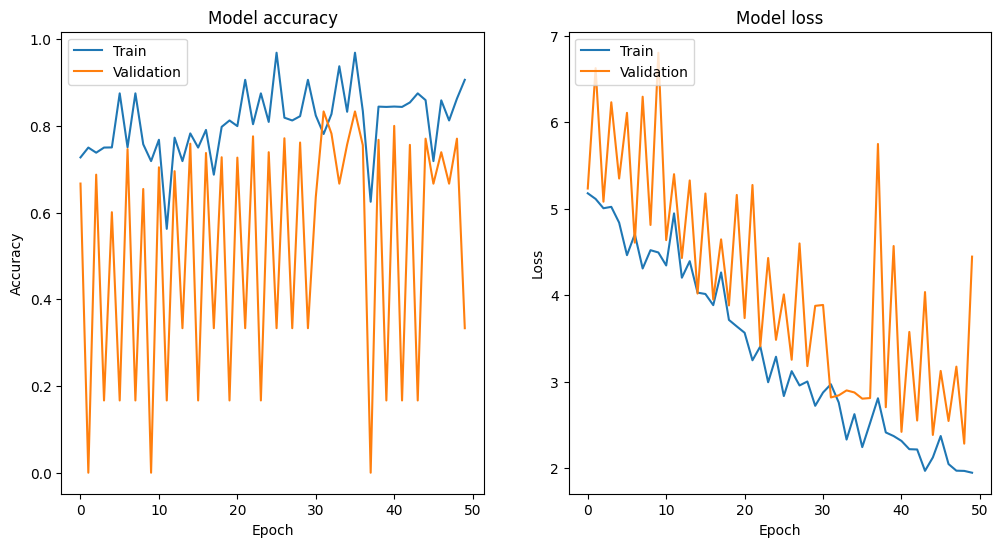

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
# Make predictions on the test dataset
predictions = alexnet_model.predict(test_generator)


36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step


In [ ]:
import numpy as np

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Print some example predictions
for i in range(5):
    print(f"True Label: {class_labels[true_classes[i]]}, Predicted: {class_labels[predicted_classes[i]]}")


True Label: Ayrshire cattle, Predicted: Holstein Friesian cattle
True Label: Ayrshire cattle, Predicted: Red Dane cattle
True Label: Ayrshire cattle, Predicted: Ayrshire cattle
True Label: Ayrshire cattle, Predicted: Ayrshire cattle
True Label: Ayrshire cattle, Predicted: Brown Swiss cattle


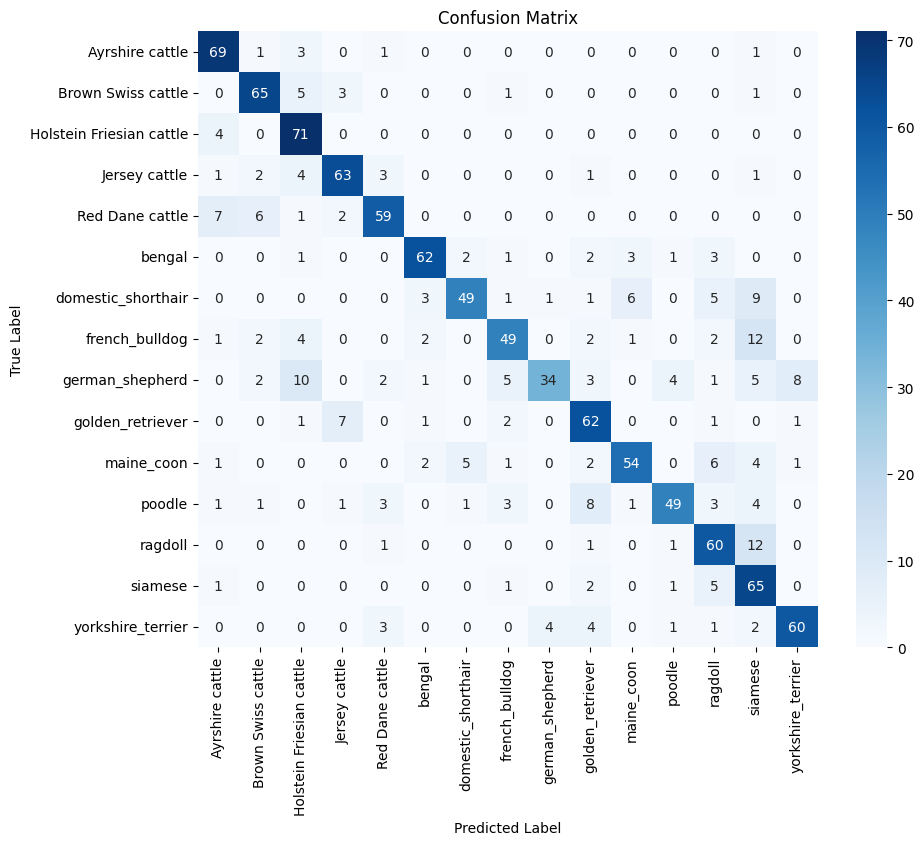

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the true and predicted labels
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision, recall, and F1 score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Precision: 0.7910590596206166
Recall: 0.7735346358792184
F1 Score: 0.7711009084183557


In [ ]:
# Print a detailed classification report
class_labels = list(test_generator.class_indices.keys())  # Get the class labels

report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)


                          precision    recall  f1-score   support

         Ayrshire cattle       0.81      0.92      0.86        75
      Brown Swiss cattle       0.82      0.87      0.84        75
Holstein Friesian cattle       0.71      0.95      0.81        75
           Jersey cattle       0.83      0.84      0.83        75
         Red Dane cattle       0.82      0.79      0.80        75
                  bengal       0.87      0.83      0.85        75
      domestic_shorthair       0.86      0.65      0.74        75
          french_bulldog       0.77      0.65      0.71        75
         german_shepherd       0.87      0.45      0.60        75
        golden_retriever       0.70      0.83      0.76        75
              maine_coon       0.83      0.71      0.77        76
                  poodle       0.86      0.65      0.74        75
                 ragdoll       0.69      0.80      0.74        75
                 siamese       0.56      0.87      0.68        75
       yo

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
# Load the EfficientNetB0 model, excluding the top fully connected layers
efficientnet = EfficientNetB0(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
efficientnet.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
train_directory = '/content/drive/My Drive/AnimalBreedClassification/train'
test_directory = '/content/drive/My Drive/AnimalBreedClassification/test'

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),  # Ensuring images are resized to 224x224
    batch_size=32,
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 6376 images belonging to 15 classes.
Found 1126 images belonging to 15 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to prevent updating its weights
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = base_model.output
x = Flatten()(x)  # Flatten the output of the convolutional base
x = Dense(512, activation='relu')(x)  # Fully connected layer with 512 units
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer with softmax activation

# Create the model
model2 = Model(inputs=base_model.input, outputs=output)

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,567,951 (105.16 MB)

 Trainable params: 12,853,263 (49.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5473 - loss: 1.5212
Epoch 1: val_accuracy improved from 0.71786 to 0.78330, saving model to alexnet_best_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 178s 800ms/step - accuracy: 0.5480 - loss: 1.5188 - val_accuracy: 0.7833 - val_loss: 0.6625
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8325 - loss: 0.5307
Epoch 2: val_accuracy improved from 0.78330 to 0.83570, saving model to alexnet_best_model.keras
200/200 ━━━━━━━━━━━━━━━━━━━━ 145s 712ms/step - accuracy: 0.8325 - loss: 0.5306 - val_accuracy: 0.8357 - val_loss: 0.4919
Epoch 3/10
 79/200 ━━━━━━━━━━━━━━━━━━━━ 2:23 1s/step - accuracy: 0.8944 - loss: 0.3383